In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv

--2022-02-10 17:35:35--  http://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628633 (614K) [application/x-httpd-php]
Saving to: ‘carbon_nanotubes.csv’

carbon_nanotubes.cs 100%[===================>] 613.90K  1.72MB/s    in 0.3s    

2022-02-10 17:35:35 (1.72 MB/s) - ‘carbon_nanotubes.csv’ saved [628633/628633]



In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('carbon_nanotubes.csv', sep = ';')

In [3]:
data

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"
...,...,...,...,...,...,...,...,...
10716,12,6,"0,834201","0,399891","0,89127","0,841858","0,405882","0,891356"
10717,12,6,"0,698374","0,24471","0,962699","0,706555","0,248416","0,962833"
10718,12,6,"0,923823","0,568913","0,819842","0,929403","0,576284","0,819879"
10719,12,6,"0,934978","0,602319","0,938889","0,941844","0,610608","0,938755"


In [4]:
data.isnull().values.any()

False

In [5]:
for i in range(2, len(data.columns)):
  data.iloc[:, i] = data.iloc[:, i].map(lambda x: float(x[:1] + '.' + x[2:]))

In [6]:
data.dtypes

Chiral indice n                       int64
Chiral indice m                       int64
Initial atomic coordinate u         float64
Initial atomic coordinate v         float64
Initial atomic coordinate w         float64
Calculated atomic coordinates u'    float64
Calculated atomic coordinates v'    float64
Calculated atomic coordinates w'    float64
dtype: object

In [7]:
data

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...
10716,12,6,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,12,6,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,12,6,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,12,6,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


In [8]:
minn = [min(data.iloc[:, 0]), min(data.iloc[:, 1])]
maxx = [max(data.iloc[:, 0]), max(data.iloc[:, 1])]

for i in range(2):
  data.iloc[:, i] = data.iloc[:, i].map(lambda x: (x - minn[i])/(maxx[i] - minn[i]))
data

data = data.rename(columns={'Chiral indice n': 'Chi_n', 'Chiral indice m': 'Chi_m', 'Initial atomic coordinate u':'Iac_u',
                     'Initial atomic coordinate v':'Iac_v', 'Initial atomic coordinate w':'Iac_w', 'Calculated atomic coordinates u\'':'Cac_u',
                     'Calculated atomic coordinates v\'':'Cac_v', 'Calculated atomic coordinates w\'':'Cac_w'})

In [9]:
data

,Chi_n,Chi_m,Iac_u,Iac_v,Iac_w,Cac_u,Cac_v,Cac_w
0,0.0,0.0,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,0.0,0.0,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,0.0,0.0,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,0.0,0.0,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,0.0,0.0,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...
10716,1.0,1.0,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,1.0,1.0,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,1.0,1.0,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,1.0,1.0,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


In [10]:
from sklearn.utils import shuffle
X, y = data.iloc[:, 0:5], data.iloc[:, 5:8]
X_shuffle, y_shuffle = shuffle(X, y, random_state=43)
X_shuffle = X_shuffle.reset_index(drop=True)
y_shuffle = y_shuffle.reset_index(drop=True)

In [11]:
X_shuffle_train = X_shuffle[:round(10721 * 0.8)]
X_shuffle_test = X_shuffle[round(10721 * 0.8):]
y_shuffle_train = y_shuffle[:round(10721 * 0.8)]
y_shuffle_test = y_shuffle[round(10721 * 0.8):]



In [12]:
columns = X_shuffle_train.columns

for col in columns:
  X_shuffle_train[col + '2'] = X_shuffle_train[col]**2
  X_shuffle_test[col + '2'] = X_shuffle_test[col]**2

X_shuffle_train['Chi_nm'] = X_shuffle_train['Chi_n']* X_shuffle_train['Chi_m']
X_shuffle_test['Chi_nm'] = X_shuffle_test['Chi_n']* X_shuffle_train['Chi_m']




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [13]:
X_shuffle_train

,Chi_n,Chi_m,Iac_u,Iac_v,Iac_w,Chi_n2,Chi_m2,Iac_u2,Iac_v2,Iac_w2,Chi_nm
0,0.5,0.0,0.137263,0.261844,0.940182,0.25,0.00,0.018841,0.068562,0.883942,0.00
1,0.3,0.6,0.770027,0.412024,0.805055,0.09,0.36,0.592942,0.169764,0.648114,0.18
2,0.8,0.6,0.577314,0.905088,0.501184,0.64,0.36,0.333291,0.819184,0.251185,0.48
3,0.8,1.0,0.817844,0.392565,0.946163,0.64,1.00,0.668869,0.154107,0.895224,0.80
4,0.7,0.6,0.092590,0.388891,0.210904,0.49,0.36,0.008573,0.151236,0.044480,0.42
...,...,...,...,...,...,...,...,...,...,...,...
8572,0.5,1.0,0.915031,0.660526,0.471100,0.25,1.00,0.837282,0.436295,0.221935,0.50
8573,0.8,1.0,0.059738,0.316493,0.589020,0.64,1.00,0.003569,0.100168,0.346945,0.80
8574,0.5,0.8,0.259761,0.667201,0.835919,0.25,0.64,0.067476,0.445157,0.698761,0.40
8575,0.7,0.2,0.590494,0.888210,0.285734,0.49,0.04,0.348683,0.788917,0.081644,0.14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

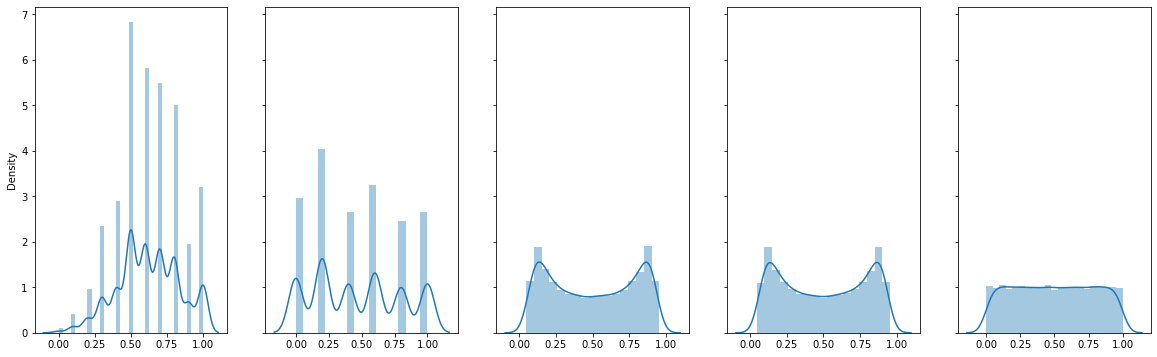

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,5, figsize=(20,6), sharey=True)
for i, col in enumerate(zip(X_shuffle_train.columns[:5])):
  sns.distplot(np.array(X_shuffle_train.loc[:, col]), ax=ax[i])
    #ax[i%5].hist(X_shuffle_train.loc[:, col], bins=10)

In [15]:
X_shuffle_train

,Chi_n,Chi_m,Iac_u,Iac_v,Iac_w,Chi_n2,Chi_m2,Iac_u2,Iac_v2,Iac_w2,Chi_nm
0,0.5,0.0,0.137263,0.261844,0.940182,0.25,0.00,0.018841,0.068562,0.883942,0.00
1,0.3,0.6,0.770027,0.412024,0.805055,0.09,0.36,0.592942,0.169764,0.648114,0.18
2,0.8,0.6,0.577314,0.905088,0.501184,0.64,0.36,0.333291,0.819184,0.251185,0.48
3,0.8,1.0,0.817844,0.392565,0.946163,0.64,1.00,0.668869,0.154107,0.895224,0.80
4,0.7,0.6,0.092590,0.388891,0.210904,0.49,0.36,0.008573,0.151236,0.044480,0.42
...,...,...,...,...,...,...,...,...,...,...,...
8572,0.5,1.0,0.915031,0.660526,0.471100,0.25,1.00,0.837282,0.436295,0.221935,0.50
8573,0.8,1.0,0.059738,0.316493,0.589020,0.64,1.00,0.003569,0.100168,0.346945,0.80
8574,0.5,0.8,0.259761,0.667201,0.835919,0.25,0.64,0.067476,0.445157,0.698761,0.40
8575,0.7,0.2,0.590494,0.888210,0.285734,0.49,0.04,0.348683,0.788917,0.081644,0.14


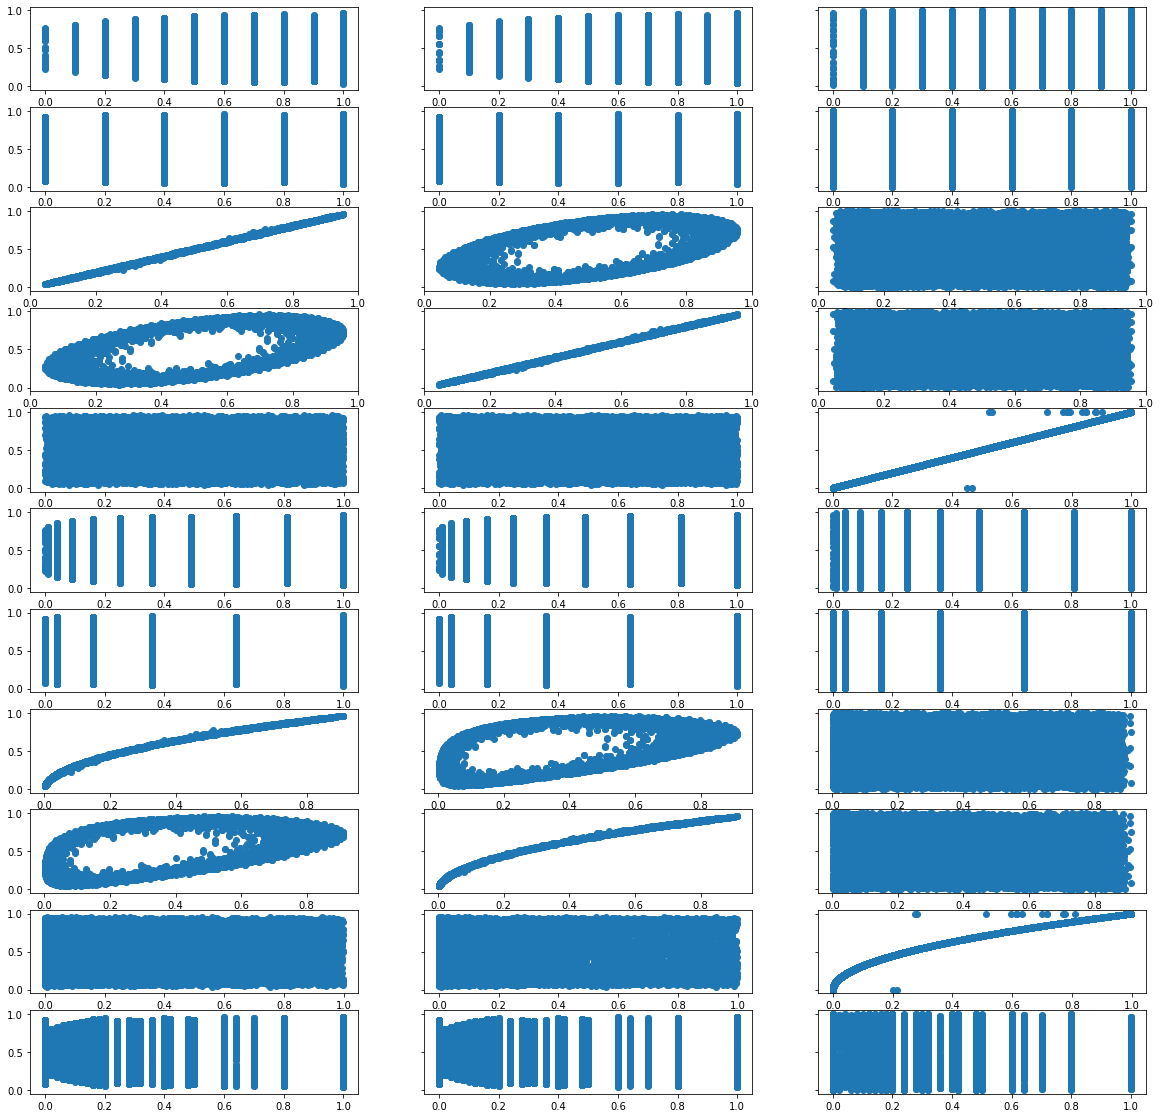

In [16]:
f, ax = plt.subplots(11,3, figsize=(20,20), sharey=True)

i = 0
for j in X_shuffle_train.columns:
  for k in y_shuffle_train.columns:
    ax[i//3, i%3].scatter(X_shuffle_train[j], y_shuffle_train[k])
    i += 1


In [17]:
X_shuffle_train = X_shuffle_train[['Iac_u', 'Iac_v', 'Iac_w', 'Iac_u2', 'Iac_v2', 'Iac_w2']]
X_shuffle_test = X_shuffle_test[['Iac_u', 'Iac_v', 'Iac_w', 'Iac_u2', 'Iac_v2', 'Iac_w2']]

In [18]:
columns = X_shuffle_train.columns[:3]

for col in columns:
  X_shuffle_train[col + '3'] = X_shuffle_train[col]**3
  X_shuffle_test[col + '3'] = X_shuffle_test[col]**3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
X_shuffle_train

,Iac_u,Iac_v,Iac_w,Iac_u2,Iac_v2,Iac_w2,Iac_u3,Iac_v3,Iac_w3
0,0.137263,0.261844,0.940182,0.018841,0.068562,0.883942,0.002586,0.017953,0.831067
1,0.770027,0.412024,0.805055,0.592942,0.169764,0.648114,0.456581,0.069947,0.521767
2,0.577314,0.905088,0.501184,0.333291,0.819184,0.251185,0.192414,0.741434,0.125890
3,0.817844,0.392565,0.946163,0.668869,0.154107,0.895224,0.547030,0.060497,0.847028
4,0.092590,0.388891,0.210904,0.008573,0.151236,0.044480,0.000794,0.058814,0.009381
...,...,...,...,...,...,...,...,...,...
8572,0.915031,0.660526,0.471100,0.837282,0.436295,0.221935,0.766139,0.288184,0.104554
8573,0.059738,0.316493,0.589020,0.003569,0.100168,0.346945,0.000213,0.031702,0.204357
8574,0.259761,0.667201,0.835919,0.067476,0.445157,0.698761,0.017528,0.297009,0.584107
8575,0.590494,0.888210,0.285734,0.348683,0.788917,0.081644,0.205895,0.700724,0.023328


In [21]:
y_shuffle_train

,Cac_u,Cac_v,Cac_w
0,0.128236,0.255828,0.940160
1,0.771147,0.410059,0.805015
2,0.578339,0.909797,0.501483
3,0.821512,0.391984,0.946266
4,0.086782,0.386020,0.210617
...,...,...,...
8572,0.922756,0.662976,0.470943
8573,0.055425,0.314624,0.589019
8574,0.260687,0.670834,0.835749
8575,0.592181,0.892990,0.285746


In [23]:
from sklearn.linear_model import Ridge

clf1 = Ridge(alpha = 1.0)
clf1.fit(X_shuffle_train, y_shuffle_train['Cac_u'])
print(clf1.score(X_shuffle_train, y_shuffle_train['Cac_u']))


clf2 = Ridge(alpha = 1.0)
clf2.fit(X_shuffle_train, y_shuffle_train['Cac_v'])
print(clf2.score(X_shuffle_train, y_shuffle_train['Cac_v']))


clf3 = Ridge(alpha = 1.0)
clf3.fit(X_shuffle_train, y_shuffle_train['Cac_w'])
print(clf3.score(X_shuffle_train, y_shuffle_train['Cac_w']))

0.9998116262698479
0.999818170828308
0.998222915231325


In [36]:
from pandas.core.base import NoNewAttributesMixin
from sklearn.model_selection import cross_val_score

score, needed_alpha = 0, None
alphas = [0.1 * 2 ** i for i in range(10)]
for alpha in alphas:
  clf1, clf2, clf3 = Ridge(alpha), Ridge(alpha), Ridge(alpha)
  scores = (cross_val_score(clf1, X_shuffle_train, y_shuffle_train['Cac_u'], cv=5).mean() + \
           cross_val_score(clf2, X_shuffle_train, y_shuffle_train['Cac_v'], cv=5).mean() + \
           cross_val_score(clf2, X_shuffle_train, y_shuffle_train['Cac_v'], cv=5).mean()) / 3
  if scores > score:
    score = scores
    needed_alpha = alpha




In [38]:
clf1 = Ridge(alpha = 0.1)
clf1.fit(X_shuffle_train, y_shuffle_train['Cac_u'])
print(clf1.score(X_shuffle_train, y_shuffle_train['Cac_u']))


clf2 = Ridge(alpha = 0.1)
clf2.fit(X_shuffle_train, y_shuffle_train['Cac_v'])
print(clf2.score(X_shuffle_train, y_shuffle_train['Cac_v']))


clf3 = Ridge(alpha = 0.1)
clf3.fit(X_shuffle_train, y_shuffle_train['Cac_w'])
print(clf3.score(X_shuffle_train, y_shuffle_train['Cac_w']))

0.9998583981829198
0.9998649288849786
0.9982667470717728


In [46]:
print(clf1.score(X_shuffle_test, y_shuffle_test['Cac_u']))
print(clf2.score(X_shuffle_test, y_shuffle_test['Cac_v']))
print(clf3.score(X_shuffle_test, y_shuffle_test['Cac_w']))

0.9998643109575074
0.9998642585527422
0.9956396071737208


In [30]:
alphas

[0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2]

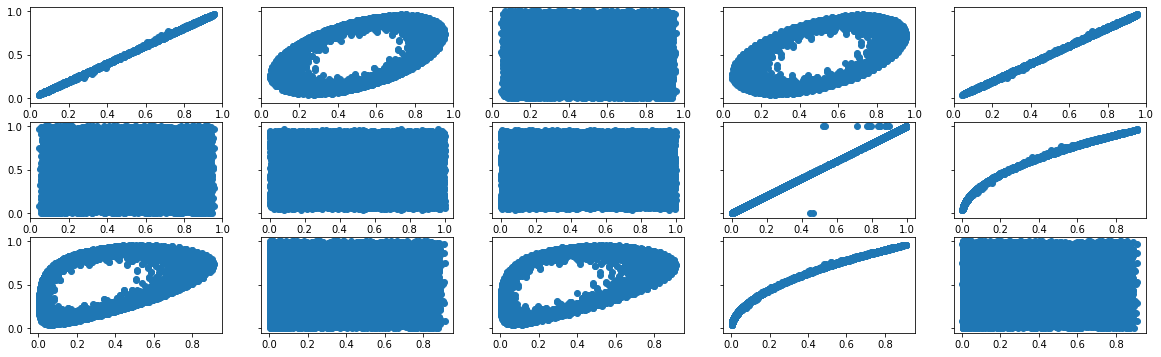

In [20]:
f, ax = plt.subplots(3,5, figsize=(20,6), sharey=True)

i = 0
for j in X_shuffle_train.columns[:5]:
  for k in y_shuffle_train.columns:
    ax[i//5, i%5].scatter(X_shuffle_train[j], y_shuffle_train[k])
    i += 1


#pd.DataFrame(np.array([X_shuffle_train['Chi_n'],y_shuffle_train['Cac_u']]).T).plot.scatter(0, 1, s=12, grid=True)
#plt.xlabel('Chi_n')
#plt.ylabel('Cac_u')
#plt.show()

In [ ]:
import seaborn as sns
for col in X_shuffle_train.columns:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


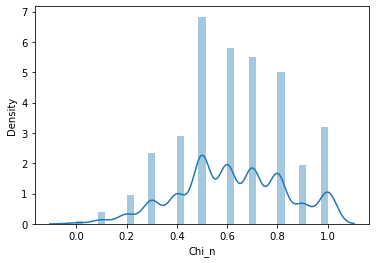

In [ ]:
import seaborn as sns
sns.distplot(X_shuffle_train.loc[:, 'Chi_n'])

In [ ]:
from sklearn.preprocessing import StandardScaler

new_data = data.iloc[:, 0:2]
new_data
scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(new_data), columns = {'Chiral indice n', 'Chiral indice m'})
new_data

data.iloc[:, 0:2] = new_data 
data

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,-2.910823,-1.388042,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,-2.910823,-1.388042,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,-2.910823,-1.388042,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,-2.910823,-1.388042,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,-2.910823,-1.388042,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...
10716,1.764653,1.581428,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,1.764653,1.581428,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,1.764653,1.581428,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,1.764653,1.581428,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


In [ ]:
dfrom sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge
logreg = Ridge(alpha=1.0, solver='lbfgs',multi_class='multinomial')

TypeError: ignored

In [ ]:
data.iloc[2, 2].to_numeric()

AttributeError: ignored

In [ ]:
data.value_counts()

Chiral indice n  Chiral indice m  Initial atomic coordinate u  Initial atomic coordinate v  Initial atomic coordinate w  Calculated atomic coordinates u'  Calculated atomic coordinates v'  Calculated atomic coordinates w'
2                1                0,282702                     0,357871                     0,397985                     0,229138                          0,328729                          0,398581                            1
9                4                0,516259                     0,143626                     0,838724                     0,516325                          0,141388                          0,838874                            1
                                  0,523522                     0,875967                     0,977821                     0,529933                          0,887584                          0,978061                            1
                                  0,526195                     0,149028                     0,095

In [ ]:
data = {'set_of_numbers': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan]}
df = pd.DataFrame(data)

In [ ]:
df.isnull().values.any()


True

In [ ]:
data[data.value]